In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import plotly.express as px

In [4]:
data = pd.read_csv('mexico-city-real-estate-1.csv')
data.head()

Unnamed: 0 property_type                   place_with_parent_names   
0           1     apartment  |Miguel Hidalgo|Distrito Federal|México|  \
1           2         house      |Iztapalapa|Distrito Federal|México|   
2           3     apartment         |Tlalpan|Distrito Federal|México|   
3           4     apartment  |Miguel Hidalgo|Distrito Federal|México|   
4           5     apartment       |Benito Juárez|Quintana Roo|México|   

                  lat-lon  price_aprox_usd  surface_covered_in_m2   
0   23.634501,-102.552788        289775.66                   54.0  \
1     19.31033,-99.068557         79661.96                   80.0   
2    19.279771,-99.234597         48822.82                  100.0   
3   23.634501,-102.552788        337720.36                  135.0   
4  21.1902642,-86.8198375        875000.00                  263.0   

    price_per_m2  
0  101851.851900  
1   18900.000000  
2    9266.670000  
3   47481.481480  
4    3326.996198

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4628 non-null   int64  
 1   property_type            4628 non-null   object 
 2   place_with_parent_names  4628 non-null   object 
 3   lat-lon                  4144 non-null   object 
 4   price_aprox_usd          4538 non-null   float64
 5   surface_covered_in_m2    4436 non-null   float64
 6   price_per_m2             4249 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 253.2+ KB


In [6]:
del data['Unnamed: 0']

In [7]:
data.head()

property_type                   place_with_parent_names   
0     apartment  |Miguel Hidalgo|Distrito Federal|México|  \
1         house      |Iztapalapa|Distrito Federal|México|   
2     apartment         |Tlalpan|Distrito Federal|México|   
3     apartment  |Miguel Hidalgo|Distrito Federal|México|   
4     apartment       |Benito Juárez|Quintana Roo|México|   

                  lat-lon  price_aprox_usd  surface_covered_in_m2   
0   23.634501,-102.552788        289775.66                   54.0  \
1     19.31033,-99.068557         79661.96                   80.0   
2    19.279771,-99.234597         48822.82                  100.0   
3   23.634501,-102.552788        337720.36                  135.0   
4  21.1902642,-86.8198375        875000.00                  263.0   

    price_per_m2  
0  101851.851900  
1   18900.000000  
2    9266.670000  
3   47481.481480  
4    3326.996198

In [8]:
data.isnull().sum()

property_type                0
place_with_parent_names      0
lat-lon                    484
price_aprox_usd             90
surface_covered_in_m2      192
price_per_m2               379
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.reset_index(drop=True)

property_type                          place_with_parent_names   
0        apartment         |Miguel Hidalgo|Distrito Federal|México|  \
1            house             |Iztapalapa|Distrito Federal|México|   
2        apartment                |Tlalpan|Distrito Federal|México|   
3        apartment         |Miguel Hidalgo|Distrito Federal|México|   
4        apartment              |Benito Juárez|Quintana Roo|México|   
...            ...                                              ...   
3834     apartment          |Benito Juárez|Distrito Federal|México|   
3835     apartment              |Benito Juárez|Quintana Roo|México|   
3836         house                |Solidaridad|Quintana Roo|México|   
3837     apartment             |Cuauhtémoc|Distrito Federal|México|   
3838     apartment  |Cuajimalpa de Morelos|Distrito Federal|México|   

                     lat-lon  price_aprox_usd  surface_covered_in_m2   
0      23.634501,-102.552788        289775.66                   54.0  \
1        19.31033,-99.068557         79661.96                   80.0   
2       19.279771,-99.234597         48822.82                  100.0   
3      23.634501,-102.552788        337720.36                  135.0   
4     21.1902642,-86.8198375        875000.00                  263.0   
...                      ...              ...                    ...   
3834    19.381729,-99.164986        242357.82                  150.0   
3835    20.797201,-86.967773        200000.00                  240.0   
3836    20.613375,-87.089897        480000.00                  245.0   
3837   23.634501,-102.552788        129282.09                   67.0   
3838    19.392937,-99.263313        142253.50                   70.0   

       price_per_m2  
0     101851.851900  
1      18900.000000  
2       9266.670000  
3      47481.481480  
4       3326.996198  
...             ...  
3834   30666.666670  
3835     833.333333  
3836    1959.183673  
3837   36623.880600  
3838   38571.428570  

[3839 rows x 6 columns]

In [11]:
data[['lat', 'lon']] = data['lat-lon'].str.split(',', expand=True)

In [12]:
data.head()

property_type                   place_with_parent_names   
0     apartment  |Miguel Hidalgo|Distrito Federal|México|  \
1         house      |Iztapalapa|Distrito Federal|México|   
2     apartment         |Tlalpan|Distrito Federal|México|   
3     apartment  |Miguel Hidalgo|Distrito Federal|México|   
4     apartment       |Benito Juárez|Quintana Roo|México|   

                  lat-lon  price_aprox_usd  surface_covered_in_m2   
0   23.634501,-102.552788        289775.66                   54.0  \
1     19.31033,-99.068557         79661.96                   80.0   
2    19.279771,-99.234597         48822.82                  100.0   
3   23.634501,-102.552788        337720.36                  135.0   
4  21.1902642,-86.8198375        875000.00                  263.0   

    price_per_m2         lat          lon  
0  101851.851900   23.634501  -102.552788  
1   18900.000000    19.31033   -99.068557  
2    9266.670000   19.279771   -99.234597  
3   47481.481480   23.634501  -102.552788  
4    3326.996198  21.1902642  -86.8198375

In [13]:
del data['lat-lon']

In [14]:
data['state'] = data['place_with_parent_names'].str.split('|', expand=True)[2]

In [15]:
del data['place_with_parent_names']

In [16]:
data.property_type.unique()

array(['apartment', 'house', 'store'], dtype=object)

In [17]:
data['lat']=data['lat'].astype(float)
data['lon']=data['lon'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3839 entries, 0 to 4627
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          3839 non-null   object 
 1   price_aprox_usd        3839 non-null   float64
 2   surface_covered_in_m2  3839 non-null   float64
 3   price_per_m2           3839 non-null   float64
 4   lat                    3839 non-null   float64
 5   lon                    3839 non-null   float64
 6   state                  3839 non-null   object 
dtypes: float64(5), object(2)
memory usage: 239.9+ KB


In [19]:
data.describe()

price_aprox_usd  surface_covered_in_m2  price_per_m2          lat   
count     3.839000e+03            3839.000000  3.839000e+03  3839.000000  \
mean      2.718469e+05             215.814796  2.253366e+04    19.716171   
std       6.045877e+05            1909.940663  8.005500e+04     0.801886   
min       6.585810e+03               1.000000  2.123116e+01    18.015418   
25%       6.153781e+04              70.000000  1.013831e+04    19.362864   
50%       1.264476e+05             100.000000  1.628050e+04    19.399815   
75%       2.589268e+05             204.000000  2.896696e+04    19.469689   
max       2.008064e+07          113100.000000  4.750000e+06    23.634501   

               lon  
count  3839.000000  
mean    -97.266730  
std       4.545244  
min    -102.611172  
25%     -99.187731  
50%     -99.152302  
75%     -99.098524  
max     -86.744965

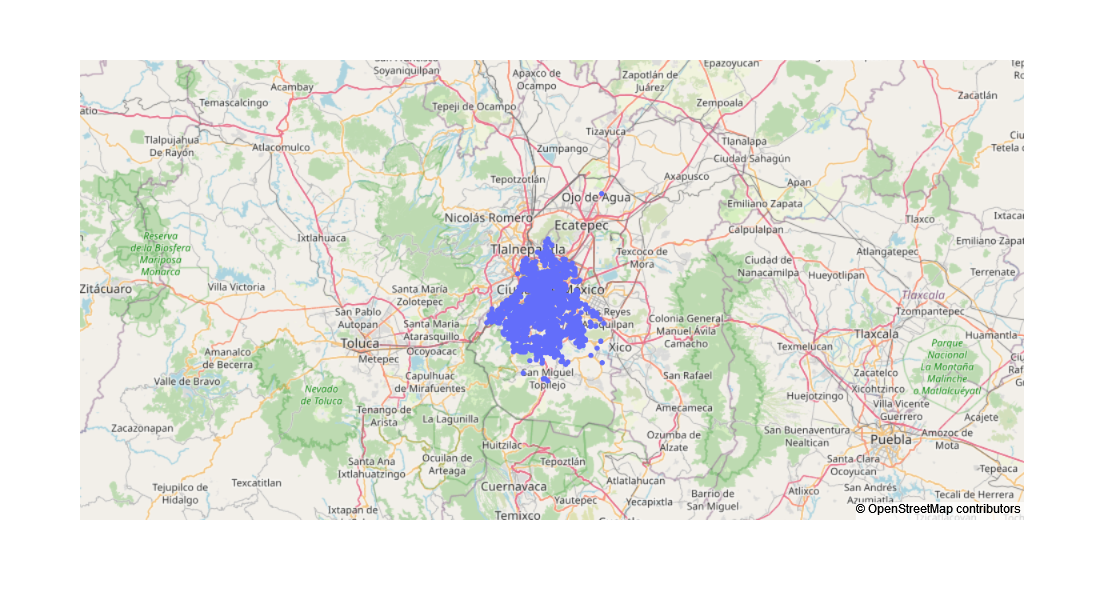

In [20]:
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()